In [15]:
import os
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
from matplotlib import style
%matplotlib inline
warnings.filterwarnings('ignore')
%precision 2

'%.2f'

# Read 

In [16]:
A = pd.read_csv("russia_losses_equipment.csv")
A.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,BUK,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment
0,2022-02-26,3,27,26,146,706,49,1,4,30,60,2,2,0,NaN
1,2022-02-28,5,29,29,150,816,74,1,21,291,60,3,2,5,NaN
2,2022-03-01,6,29,29,198,846,77,1,24,305,60,3,2,7,NaN
3,2022-03-02,7,30,31,211,862,85,1,40,355,60,3,2,9,NaN
4,2022-03-03,8,30,31,217,900,90,1,42,374,60,3,2,11,NaN


In [17]:
A.shape

(19, 15)

In [18]:
B= pd.read_csv("russia_losses_personnel.csv")
B.head()

,date,day,personnel,POW,personnel*
0,2022-02-26,3,4300,NaN,NaN
1,2022-02-28,5,5300,NaN,NaN
2,2022-03-01,6,5710,200.0,NaN
3,2022-03-02,7,5840,NaN,NaN
4,2022-03-03,8,9000,NaN,NaN


In [19]:
B.shape

(19, 5)

In [20]:
A.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'BUK', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment'],
      dtype='object')

In [21]:
B.columns

Index(['date', 'day', 'personnel', 'POW', 'personnel*'], dtype='object')

In [22]:
df = pd.merge(A,B)
df.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'BUK', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment', 'personnel',
       'POW', 'personnel*'],
      dtype='object')

In [23]:
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,BUK,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,personnel,POW,personnel*
0,2022-02-26,3,27,26,146,706,49,1,4,30,60,2,2,0,NaN,4300,NaN,NaN
1,2022-02-28,5,29,29,150,816,74,1,21,291,60,3,2,5,NaN,5300,NaN,NaN
2,2022-03-01,6,29,29,198,846,77,1,24,305,60,3,2,7,NaN,5710,200.0,NaN
3,2022-03-02,7,30,31,211,862,85,1,40,355,60,3,2,9,NaN,5840,NaN,NaN
4,2022-03-03,8,30,31,217,900,90,1,42,374,60,3,2,11,NaN,9000,NaN,NaN


In [24]:
df.shape

(19, 18)

<AxesSubplot:>

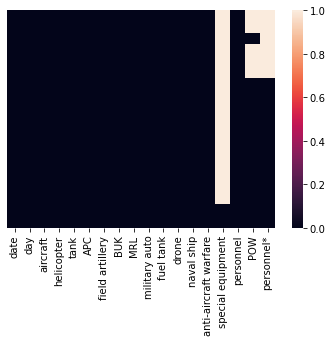

In [25]:
sns.heatmap(df.isnull(),yticklabels=False)

# Basic Analyse

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   19 non-null     object 
 1   day                    19 non-null     int64  
 2   aircraft               19 non-null     int64  
 3   helicopter             19 non-null     int64  
 4   tank                   19 non-null     int64  
 5   APC                    19 non-null     int64  
 6   field artillery        19 non-null     int64  
 7   BUK                    19 non-null     int64  
 8   MRL                    19 non-null     int64  
 9   military auto          19 non-null     int64  
 10  fuel tank              19 non-null     int64  
 11  drone                  19 non-null     int64  
 12  naval ship             19 non-null     int64  
 13  anti-aircraft warfare  19 non-null     int64  
 14  special equipment      2 non-null      float64
 15  personne

In [27]:
df.count()

date                     19
day                      19
aircraft                 19
helicopter               19
tank                     19
APC                      19
field artillery          19
BUK                      19
MRL                      19
military auto            19
fuel tank                19
drone                    19
naval ship               19
anti-aircraft warfare    19
special equipment         2
personnel                19
POW                      14
personnel*               13
dtype: int64

In [28]:
df.value_counts()

date        day  aircraft  helicopter  tank  APC   field artillery  BUK  MRL  military auto  fuel tank  drone  naval ship  anti-aircraft warfare  special equipment  personnel  POW    personnel*
2022-03-16  21   84        108         430   1375  190              1    70   819            60         11     3           43                     10.0               13800      389.0  about         1
2022-03-17  22   86        108         444   1435  201              1    72   864            60         11     3           43                     10.0               14000      405.0  about         1
dtype: int64

In [29]:
df.corr()

,day,aircraft,helicopter,tank,APC,field artillery,BUK,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,personnel,POW
day,1.000000,0.965674,0.967170,0.994720,0.991945,0.959798,NaN,0.921829,0.951587,NaN,0.944636,0.853546,0.988468,NaN,0.931884,0.912266
aircraft,0.965674,1.000000,0.932055,0.951467,0.966637,0.937365,NaN,0.818997,0.905902,NaN,0.929074,0.791561,0.932057,NaN,0.839745,0.819146
helicopter,0.967170,0.932055,1.000000,0.957255,0.950717,0.919126,NaN,0.857189,0.894357,NaN,0.978642,0.937455,0.967034,NaN,0.910487,0.912600
tank,0.994720,0.951467,0.957255,1.000000,0.985270,0.960734,NaN,0.935068,0.949924,NaN,0.931528,0.835329,0.991828,NaN,0.943519,0.894175
APC,0.991945,0.966637,0.950717,0.985270,1.000000,0.977788,NaN,0.907262,0.972034,NaN,0.943824,0.812544,0.978264,NaN,0.904138,0.883816
field artillery,0.959798,0.937365,0.919126,0.960734,0.977788,1.000000,NaN,0.907855,0.983389,NaN,0.938576,0.753874,0.961106,NaN,0.895144,0.752895
BUK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MRL,0.921829,0.818997,0.857189,0.935068,0.907262,0.907855,NaN,1.000000,0.931636,NaN,0.821910,0.745999,0.946158,NaN,0.949839,0.829334
military auto,0.951587,0.905902,0.894357,0.949924,0.972034,0.983389,NaN,0.931636,1.000000,NaN,0.910817,0.734803,0.952009,NaN,0.891329,0.794845
fuel tank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

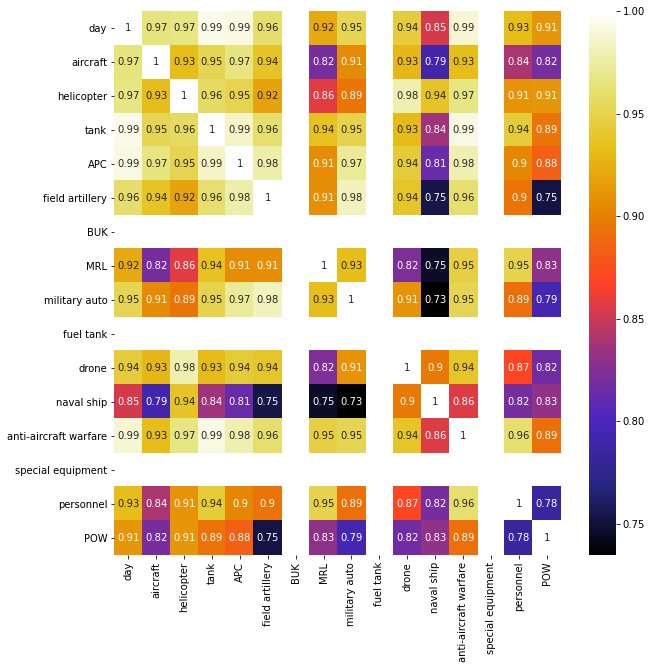

In [30]:
figure= plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap = "CMRmap")

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'aircraft'}>,
        <AxesSubplot:title={'center':'helicopter'}>,
        <AxesSubplot:title={'center':'tank'}>],
       [<AxesSubplot:title={'center':'APC'}>,
        <AxesSubplot:title={'center':'field artillery'}>,
        <AxesSubplot:title={'center':'BUK'}>,
        <AxesSubplot:title={'center':'MRL'}>],
       [<AxesSubplot:title={'center':'military auto'}>,
        <AxesSubplot:title={'center':'fuel tank'}>,
        <AxesSubplot:title={'center':'drone'}>,
        <AxesSubplot:title={'center':'naval ship'}>],
       [<AxesSubplot:title={'center':'anti-aircraft warfare'}>,
        <AxesSubplot:title={'center':'special equipment'}>,
        <AxesSubplot:title={'center':'personnel'}>,
        <AxesSubplot:title={'center':'POW'}>]], dtype=object)

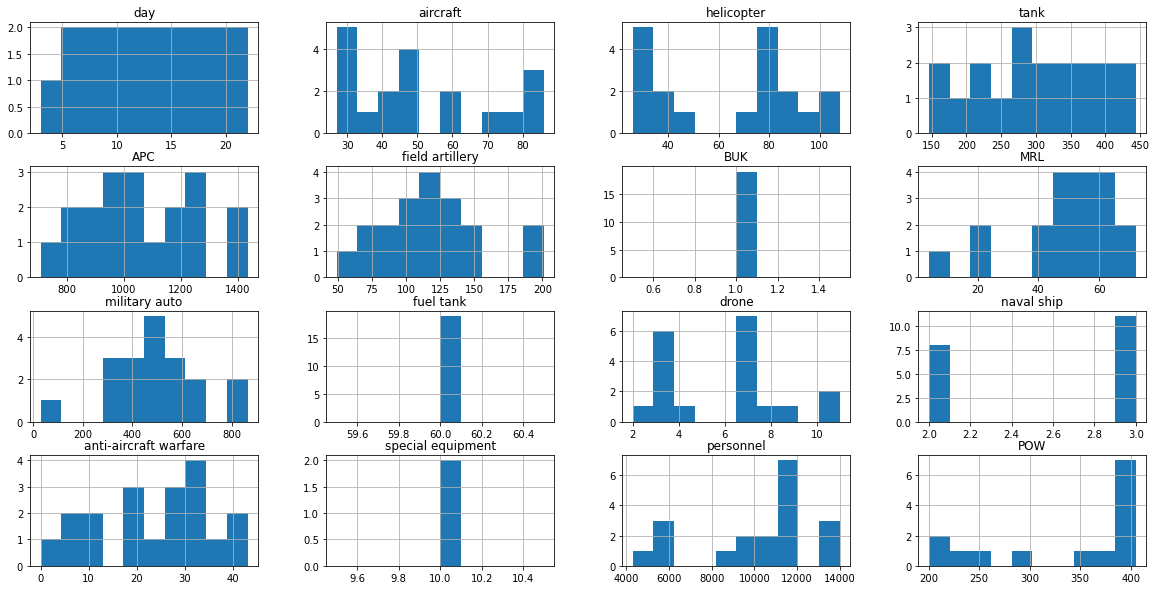

In [31]:
df.hist(figsize=(20,10))

In [32]:
df.isnull().value_counts()

date   day    aircraft  helicopter  tank   APC    field artillery  BUK    MRL    military auto  fuel tank  drone  naval ship  anti-aircraft warfare  special equipment  personnel  POW    personnel*
False  False  False     False       False  False  False            False  False  False          False      False  False       False                  True               False      False  False         11
                                                                                                                                                                                   True   True           5
                                                                                                                                                     False              False      False  False          2
                                                                                                                                                     True               False      False  True    

<AxesSubplot:>

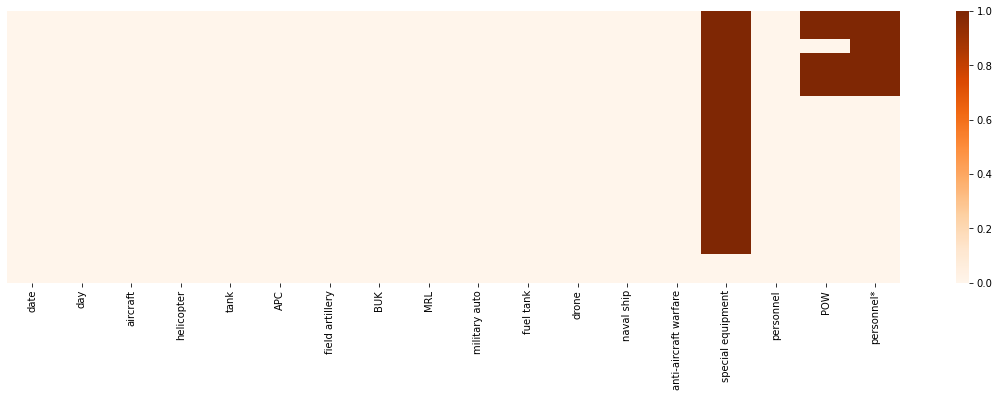

In [33]:
figure=plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=True,yticklabels=False,cmap='Oranges')

<AxesSubplot:>

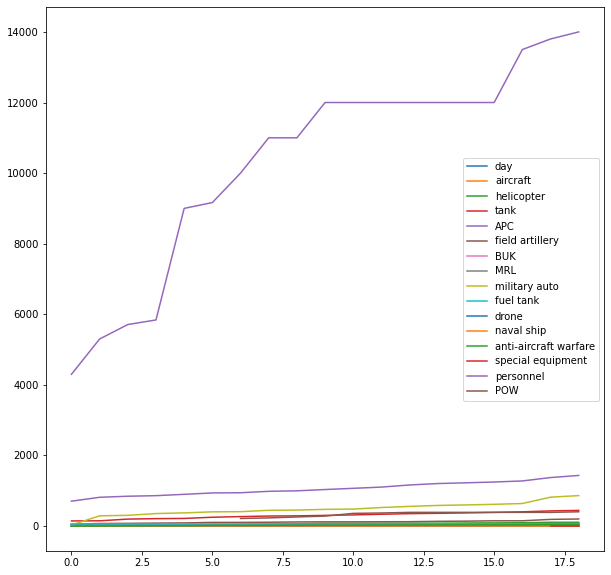

In [34]:
df.plot(figsize=(10,10))

In [35]:
df.dropna()

,date,day,aircraft,helicopter,tank,APC,field artillery,BUK,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,personnel,POW,personnel*
17,2022-03-16,21,84,108,430,1375,190,1,70,819,60,11,3,43,10.0,13800,389.0,about
18,2022-03-17,22,86,108,444,1435,201,1,72,864,60,11,3,43,10.0,14000,405.0,about


# Problem solving


#### Find the week days and and find the total number of week covered using day 

In [36]:
type(df['date'].iloc[0])

str

In [37]:
df['week']=pd.to_datetime(df['date'])
df['week'].head()

0   2022-02-26
1   2022-02-28
2   2022-03-01
3   2022-03-02
4   2022-03-03
Name: week, dtype: datetime64[ns]

In [38]:
df['Day of Week'] = df['week'].apply(lambda time:time.dayofweek)

In [39]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].apply(lambda int:dmap[int])

In [40]:
df.drop('week',inplace=True, axis=1)

In [41]:
df.head

<bound method NDFrame.head of           date  day  aircraft  helicopter  tank   APC  field artillery  BUK  \
0   2022-02-26    3        27          26   146   706               49    1   
1   2022-02-28    5        29          29   150   816               74    1   
2   2022-03-01    6        29          29   198   846               77    1   
3   2022-03-02    7        30          31   211   862               85    1   
4   2022-03-03    8        30          31   217   900               90    1   
5   2022-03-04    9        33          37   251   939              105    1   
6   2022-03-05   10        39          40   269   945              105    1   
7   2022-03-06   11        44          48   285   985              109    1   
8   2022-03-07   12        46          68   290   999              117    1   
9   2022-03-08   13        48          80   303  1036              120    1   
10  2022-03-09   14        49          81   317  1070              120    1   
11  2022-03-10   15   

In [42]:
df['Day of Week']

0     Sat
1     Mon
2     Tue
3     Wed
4     Thu
5     Fri
6     Sat
7     Sun
8     Mon
9     Tue
10    Wed
11    Thu
12    Fri
13    Sat
14    Sun
15    Mon
16    Tue
17    Wed
18    Thu
Name: Day of Week, dtype: object

In [43]:
df.head(1)

,date,day,aircraft,helicopter,tank,APC,field artillery,BUK,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,personnel,POW,personnel*,Day of Week
0,2022-02-26,3,27,26,146,706,49,1,4,30,60,2,2,0,NaN,4300,NaN,NaN,Sat


#### Find the total  number of aircrafts used and find the the day on which huge number of aircrafts used

In [44]:
df['aircraft'].sum()

970

In [ ]:
d

In [45]:
df[df['aircraft'] == max(df['aircraft'])]

,date,day,aircraft,helicopter,tank,APC,field artillery,BUK,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,personnel,POW,personnel*,Day of Week
18,2022-03-17,22,86,108,444,1435,201,1,72,864,60,11,3,43,10.0,14000,405.0,about,Thu


In [46]:
df['count']=1
a = pd.DataFrame(df.groupby(['aircraft','helicopter']).count()['count'])
a

,,count
aircraft,helicopter,
27,26,1
29,29,2
30,31,2
33,37,1
39,40,1
44,48,1
46,68,1
48,80,1
49,81,2


In [47]:
df.drop('day',inplace=True,axis=1)


In [48]:
df.head(1)

,date,aircraft,helicopter,tank,APC,field artillery,BUK,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,personnel,POW,personnel*,Day of Week,count
0,2022-02-26,27,26,146,706,49,1,4,30,60,2,2,0,NaN,4300,NaN,NaN,Sat,1


In [49]:
 df[['aircraft','helicopter','tank']]

,aircraft,helicopter,tank
0,27,26,146
1,29,29,150
2,29,29,198
3,30,31,211
4,30,31,217
5,33,37,251
6,39,40,269
7,44,48,285
8,46,68,290
9,48,80,303


In [50]:
for index,row in df.iterrows():
    print(index,row['date'])

0 2022-02-26
1 2022-02-28
2 2022-03-01
3 2022-03-02
4 2022-03-03
5 2022-03-04
6 2022-03-05
7 2022-03-06
8 2022-03-07
9 2022-03-08
10 2022-03-09
11 2022-03-10
12 2022-03-11
13 2022-03-12
14 2022-03-13
15 2022-03-14
16 2022-03-15
17 2022-03-16
18 2022-03-17


In [51]:
df['aircraft'].iloc[1]

29

In [52]:
df.head(1)

,date,aircraft,helicopter,tank,APC,field artillery,BUK,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,personnel,POW,personnel*,Day of Week,count
0,2022-02-26,27,26,146,706,49,1,4,30,60,2,2,0,NaN,4300,NaN,NaN,Sat,1


In [53]:
cols = list(df.columns.values)
df=df.iloc[:,2:14].sum(axis = 1)
df

0     1026.0
1     1452.0
2     1552.0
3     1659.0
4     1731.0
5     1870.0
6     1903.0
7     2012.0
8     2072.0
9     2167.0
10    2225.0
11    2326.0
12    2444.0
13    2536.0
14    2593.0
15    2665.0
16    2741.0
17    3120.0
18    3252.0
dtype: float64